## ITCS317 Lab Assignment 2
##### Name: Zahra Sayed Mohamed
##### ID: 202104523
##### section: 02

In [17]:
%matplotlib inline
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

#### Task 1. Load the course information into a suitable data structure in Python (you choose) then store this information in an open format file (text, JSON, etc.). Use regular expressions in Python to scan the course code, course number, time slots, and locations for S40.

In [18]:
import re
import codecs

with codecs.open('University-Schedule-2014-2_1_.txt', 'r', encoding='utf-8', errors='replace') as document:
    content = document.read()
    
RegExp = r'(([UTHMW]{1,4})\s*(\d{2}\:\d{2})\s*(\d{2}\:\d{2})\s*(S40-\d{3,4}))'
matches = re.findall(RegExp, content)

#### Task 2. Use Python to show a graph with the timing and how many rooms are occupied, per day, per timing in S40.

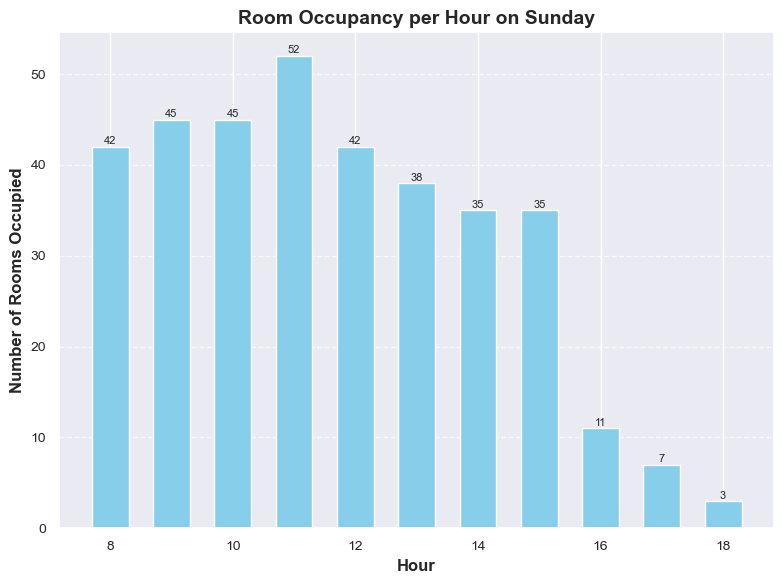

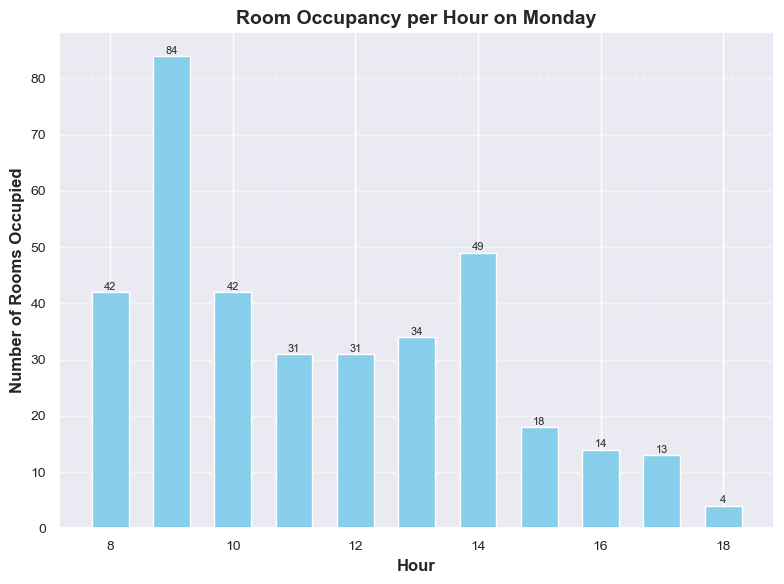

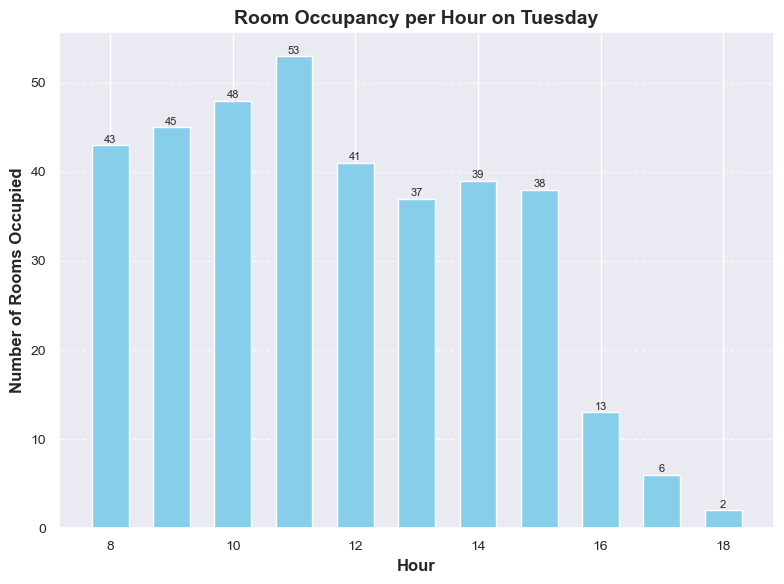

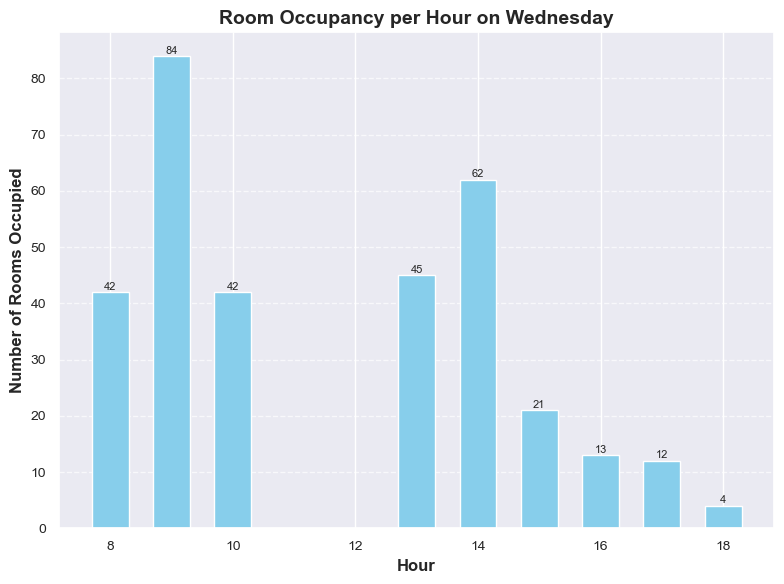

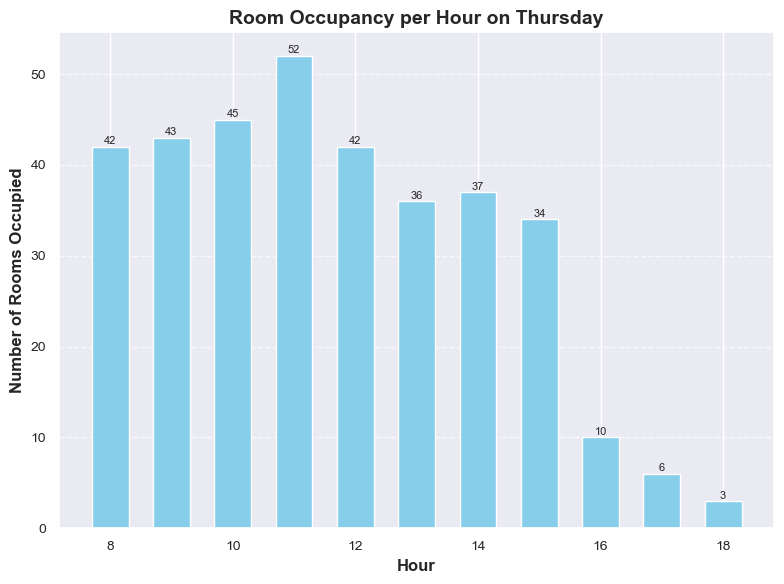

In [3]:
class_rooms = {}
rooms = set()

for match in matches:
    days, start_time, end_time, class_name = match[1:5]
    for day in days:
        rooms.add(class_name)
        if day not in class_rooms:
            class_rooms[day] = {}
        if class_name not in class_rooms[day]:
            class_rooms[day][class_name] = []
        class_rooms[day][class_name].append((start_time, end_time))

rooms = sorted(rooms)

sorted_days = sorted(class_rooms.keys(), key=lambda x: ['U', 'M', 'T', 'W', 'H'].index(x))

for day in sorted_days:
    rooms_info = class_rooms[day]
    room_occupancy = {}
    for room in rooms_info.values():
        for start, end in room:
            start_hour, end_hour = int(start.split(':')[0]), int(end.split(':')[0])
            for hour in range(start_hour, end_hour + 1):
                room_occupancy[hour] = room_occupancy.get(hour, 0) + 1

    sorted_occupancy = dict(sorted(room_occupancy.items()))
    day_names = {'U': 'Sunday', 'M': 'Monday', 'T': 'Tuesday', 'W': 'Wednesday', 'H': 'Thursday'}
    day_name = day_names.get(day, 'Unknown')

    plt.figure(figsize=(8, 6))
    plt.bar(sorted_occupancy.keys(), sorted_occupancy.values(), color='skyblue', width=0.6)
    plt.title("Room Occupancy per Hour on " + day_name, fontsize=14, fontweight='bold')
    plt.xlabel("Hour", fontsize=12, fontweight='bold')
    plt.ylabel("Number of Rooms Occupied", fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for hour, count in sorted_occupancy.items():
        plt.text(hour, count + 0.05, str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()


#### Task 3. Use Python to list in each time slot which rooms in S40 are busy and which rooms are empty.

In [13]:
day_names = {'U': 'Sunday', 'M': 'Monday', 'T': 'Tuesday', 'W': 'Wednesday', 'H': 'Thursday'}

busy_rooms = {}  

for day in class_rooms:
    busy_rooms[day] = {}
    for room in class_rooms[day]:
        for start, end in class_rooms[day][room]:
            start_hour, start_minute = map(int, start.split(':'))
            end_hour, end_minute = map(int, end.split(':'))
            for hour in range(start_hour, end_hour + 1):
                if hour not in busy_rooms[day]:
                    busy_rooms[day][hour] = []
                busy_rooms[day][hour] = list(set(busy_rooms[day][hour] + [room]))
                
sorted_days = sorted(busy_rooms.keys(), key=lambda x: ['U', 'M', 'T', 'W', 'H'].index(x))

for day in sorted_days:
    full_day_name = day_names.get(day, 'Unknown')
    print(f"Day: {full_day_name}")
    for hour in sorted(busy_rooms[day].keys()):

        all_rooms = sorted(set(rooms))  

        busy = sorted(busy_rooms[day][hour])  
        busy_set = set(busy)

        empty = [room for room in all_rooms if room not in busy_set]

        print(f"Hour: {hour}:00 - {hour+1}:00")
        print("Busy Rooms:", busy)
        print("\nEmpty Rooms:", empty)
        print("\n**********************************************************************************\n")


Day: Sunday
Hour: 8:00 - 9:00
Busy Rooms: ['S40-021', 'S40-029', 'S40-030', 'S40-032', 'S40-049', 'S40-056', 'S40-057', 'S40-058', 'S40-060', 'S40-077', 'S40-084', 'S40-085', 'S40-088', 'S40-1009', 'S40-1010', 'S40-1012', 'S40-1014', 'S40-1043', 'S40-1045', 'S40-1047', 'S40-1050', 'S40-1052', 'S40-2008', 'S40-2011', 'S40-2012', 'S40-2046', 'S40-2048', 'S40-2049', 'S40-2084', 'S40-2086', 'S40-2088']

Empty Rooms: ['S40-023', 'S40-028', 'S40-051', 'S40-079', 'S40-086', 'S40-1006', 'S40-1008', 'S40-1048', 'S40-1081', 'S40-1083', 'S40-1085', 'S40-1086', 'S40-1087', 'S40-1089', 'S40-2005', 'S40-2007', 'S40-2010', 'S40-2013', 'S40-2015', 'S40-2043', 'S40-2045', 'S40-2050', 'S40-2051', 'S40-2053', 'S40-2081', 'S40-2083', 'S40-2087', 'S40-2089', 'S40-2091']

**********************************************************************************

Hour: 9:00 - 10:00
Busy Rooms: ['S40-021', 'S40-028', 'S40-029', 'S40-030', 'S40-032', 'S40-056', 'S40-057', 'S40-058', 'S40-060', 'S40-077', 'S40-084', 'S